The sampling temperature, between 0 and 1. Higher values like 0.8 will make the output more random, 
while lower values like 0.2 will make it more focused and deterministic. 
If set to 0, the model will use log probability to automatically increase the temperature until certain thresholds are hit.

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [136]:
systems_info = {
    "default_system": {
        "name": "Default System",
        "number": 1
    },
    "proposed_pipeline_with_features": {
        "name": "Proposed Pipeline System with Additional Features",
        "number": 2
    },
    "proposed_pipeline": {
        "name": "Proposed Pipeline System",
        "number": 3
    }
}

In [137]:
testnumber  = systems_info["default_system"]["number"]

In [138]:
# Directory paths
dir = f'{systems_info["default_system"]["name"]}/'


# List of Excel files
files = [
    "GPT4 Results.xlsx",
    "GPT3.5 Results.xlsx",
    "Claude2.1 Results.xlsx",
    "Llama_2_13b Results.xlsx",
    "Zephyr_7b_beta Results.xlsx",
]

# Names of the sheets
new_sheet_names = [
    "Create a Resistor",
    "Voltage Divider",
    "High Pass RC Filter",
    "CMOS NAND Gate",
    "1 of 4 Decoder",
    "Ripple Counter",
    "Power Converter",
    "555 Timer Wave Gen",
    "Op-Amp Gain x5",
    "Arduino+Sensor+DAC"
]

colors = ['#ff7f0e', '#ff9e4a', '#ffbb78', '#1f77b4', '#729ece', '#aec7e8']

In [139]:
def analyze_excel(path, filename):
    with pd.ExcelFile(path + filename) as xls:
        sheet_names = xls.sheet_names

    # Initialize lists to store the results
    correct_parts_ys, correct_parts_us, correct_parts_fs = [], [], []
    correct_connection_ys, correct_connection_us, correct_connection_fs = [], [], []

    for sheet_name in sheet_names:

        df = pd.read_excel(path + filename, sheet_name=sheet_name)

        # Print the column names for debugging
        print(f"Column names in '{sheet_name}' sheet:", df.columns.tolist())


        df = pd.read_excel(path + filename, sheet_name=sheet_name)
        df_filtered = df[df['Temperature'] == 0.0]

        # Count occurrences of 'Y', 'U', and 'F'
        for category, correct_list in zip(['Y', 'U', 'F'], 
                                          [correct_parts_ys, correct_parts_us, correct_parts_fs]):
            count = df_filtered[df_filtered['Correct Parts'] == category].shape[0]
            total_rows = df_filtered.shape[0]
            correct_list.append((count / total_rows) * 100 if total_rows != 0 else 0)

        for category, correct_list in zip(['Y', 'U', 'F'], 
                                          [correct_connection_ys, correct_connection_us, correct_connection_fs]):
            count = df_filtered[df_filtered['Correct Connections'] == category].shape[0]
            correct_list.append((count / total_rows) * 100 if total_rows != 0 else 0)

    # Plotting the bar graph
    bar_width = 0.35
    #new_sheet_names = sheet_names  # Assuming new_sheet_names is defined elsewhere

    if len(new_sheet_names) != len(sheet_names):
        raise ValueError("Number of sheet names mismatch.")

    index = np.arange(len(new_sheet_names))

   

    #colors = ['#4ca2ff', '#acddf4', '#acddf0', '#ff4c4c', '#ffa5a5', '#ffa5a0']

    fig, ax = plt.subplots(figsize=(13, 8))

    # Plot bars
    bottom_ys = np.array(correct_parts_ys)
    bottom_us = bottom_ys + np.array(correct_parts_us)
    ax.bar(index, correct_parts_ys, bar_width, label='Correct Parts', color=colors[0])
    ax.bar(index, correct_parts_us, bar_width, bottom=bottom_ys, label='Parts Undetermined', color=colors[1])
    ax.bar(index, correct_parts_fs, bar_width, bottom=bottom_us, label='Parts Failed', color=colors[2])

    bottom_ys = np.array(correct_connection_ys)
    bottom_us = bottom_ys + np.array(correct_connection_us)
    ax.bar(index + bar_width, correct_connection_ys, bar_width, label='Correct Connections', color=colors[3])
    ax.bar(index + bar_width, correct_connection_us, bar_width, bottom=bottom_ys, label='Connections Undetermined', color=colors[4])
    ax.bar(index + bar_width, correct_connection_fs, bar_width, bottom=bottom_us, label='Connections Failed', color=colors[5])

    # Labelling and formatting
    ax.set_xlabel('Design Tasks')
    ax.set_ylabel('Accuracy (%)')
    ax.set_title('Analysis of Correct Parts and Connections')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(new_sheet_names, rotation=45)
    ax.set_ylim([0, 100])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=2)

    parsedfilename = filename.replace(" Results.xlsx", "")
    plt.tight_layout()
    plt.savefig(dir + 'Figures/' + parsedfilename + ".png")
    plt.show()

Column names in 'Input 1' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 2' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 3' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 4' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections']
Column names in 'Input 5' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections']
Column names in 'Input 6' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 7' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 8' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7']
Column names in 'Input 9' sheet: ['Temperature', '

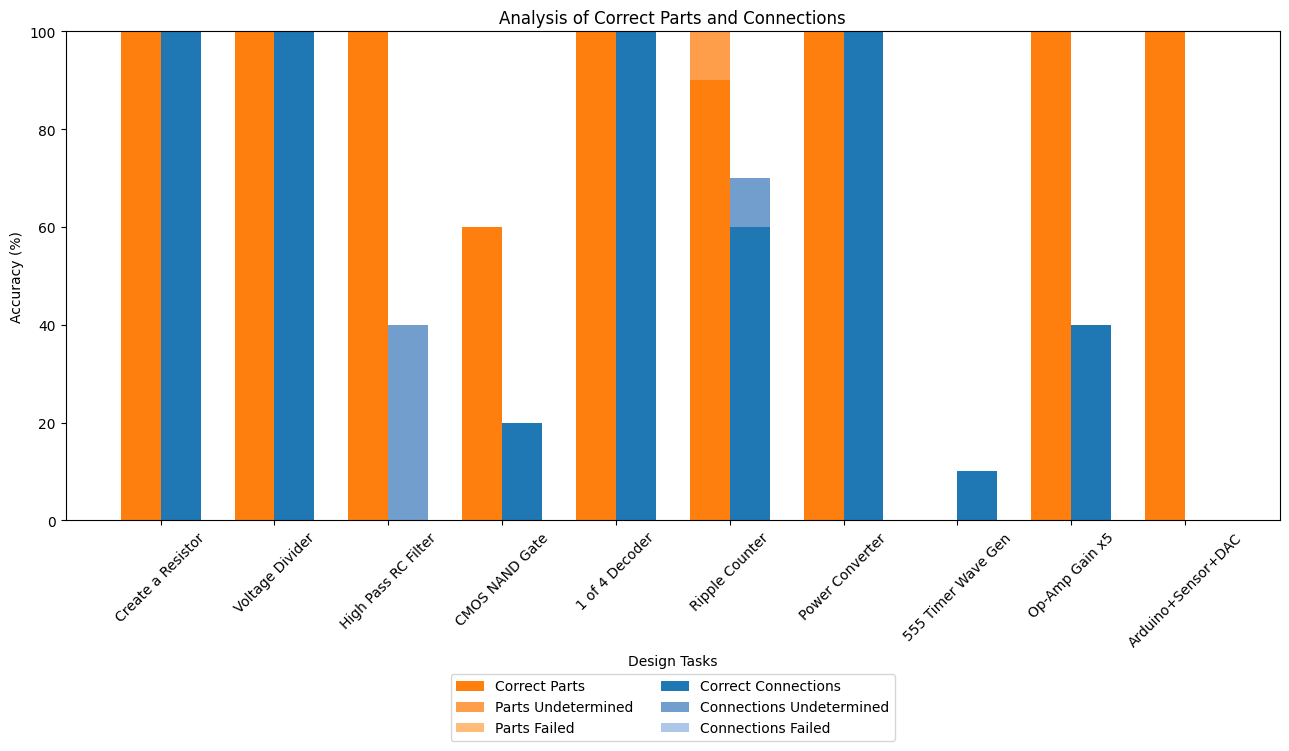

Column names in 'Input 1' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 2' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 3' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 4#' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 5' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 6' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 7#' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 8' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 9' sheet: ['Temperature', 'API Output',

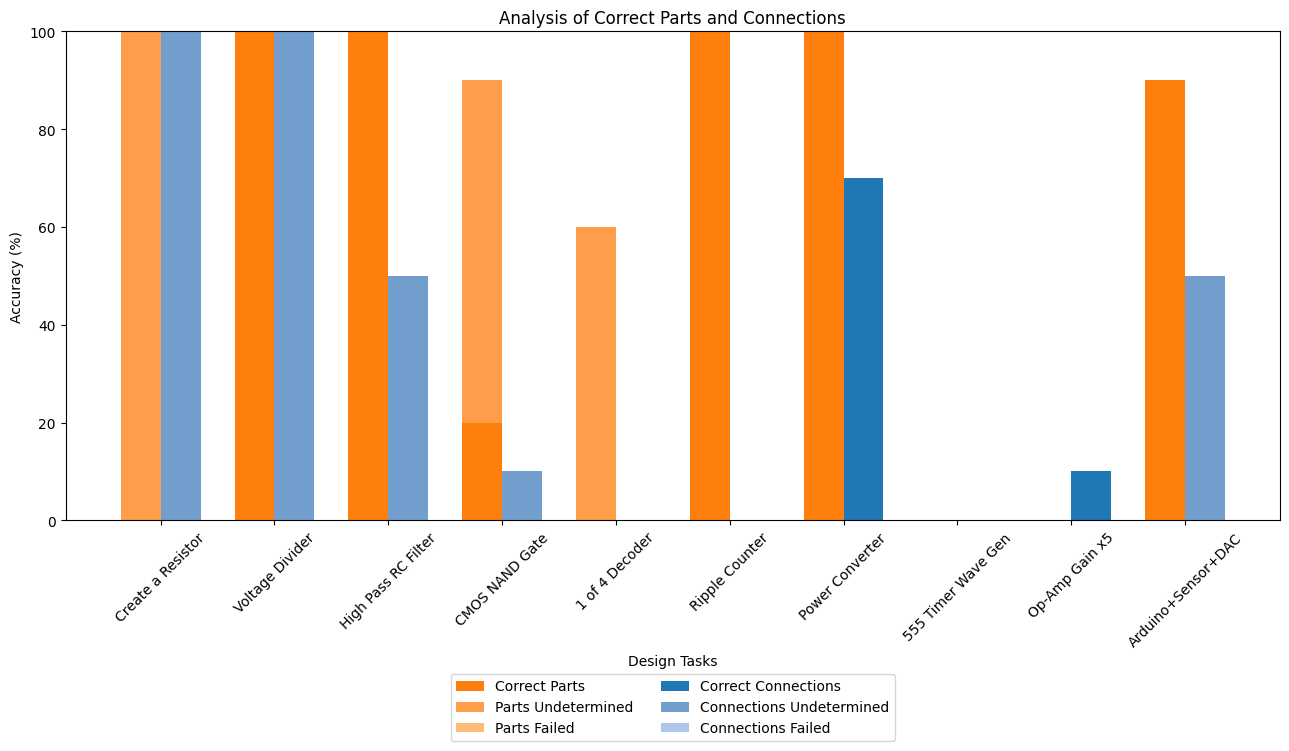

Column names in 'Input 1' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 2' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 3' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 4' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 5' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections']
Column names in 'Input 6' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections']
Column names in 'Input 7' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections']
Column names in 'Input 8' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 9' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Un

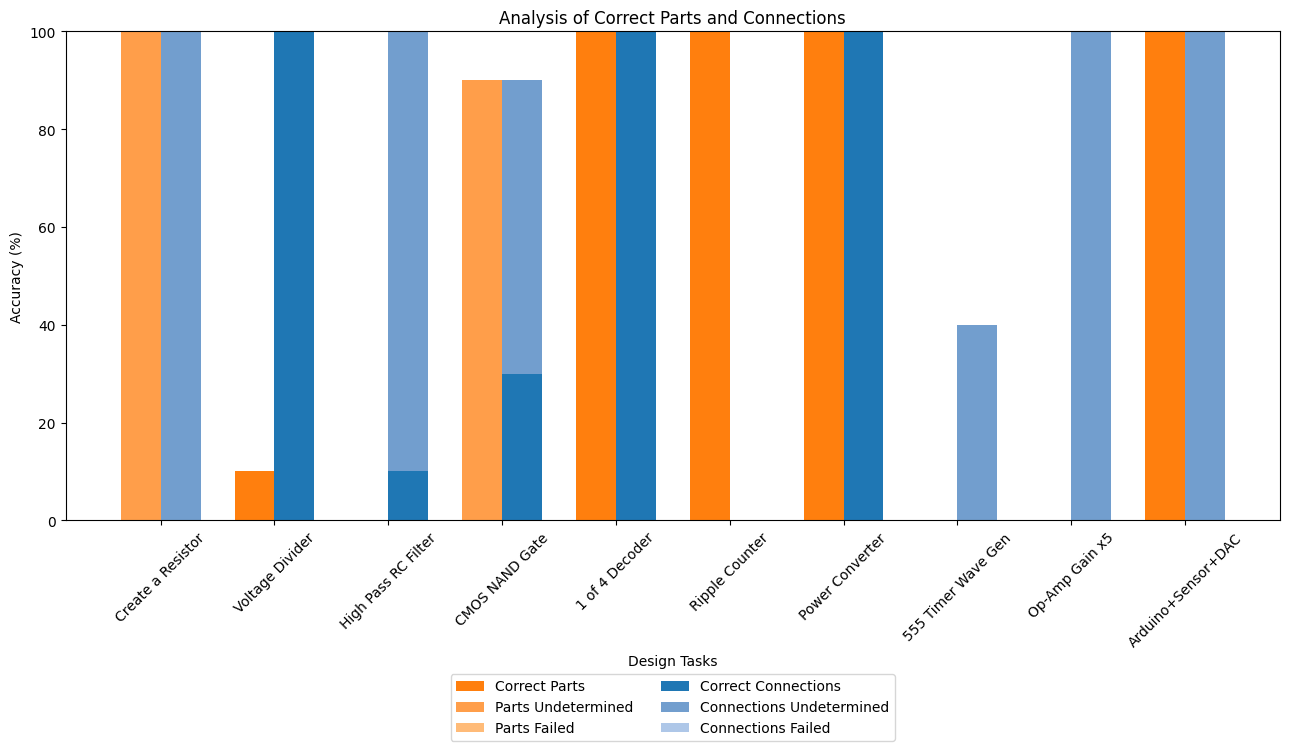

Column names in 'Input 1' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 2' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections']
Column names in 'Input 3' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 4!' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections']
Column names in 'Input 5' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 6' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 7!' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 8' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections']
Column names in 'Input 9' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', '

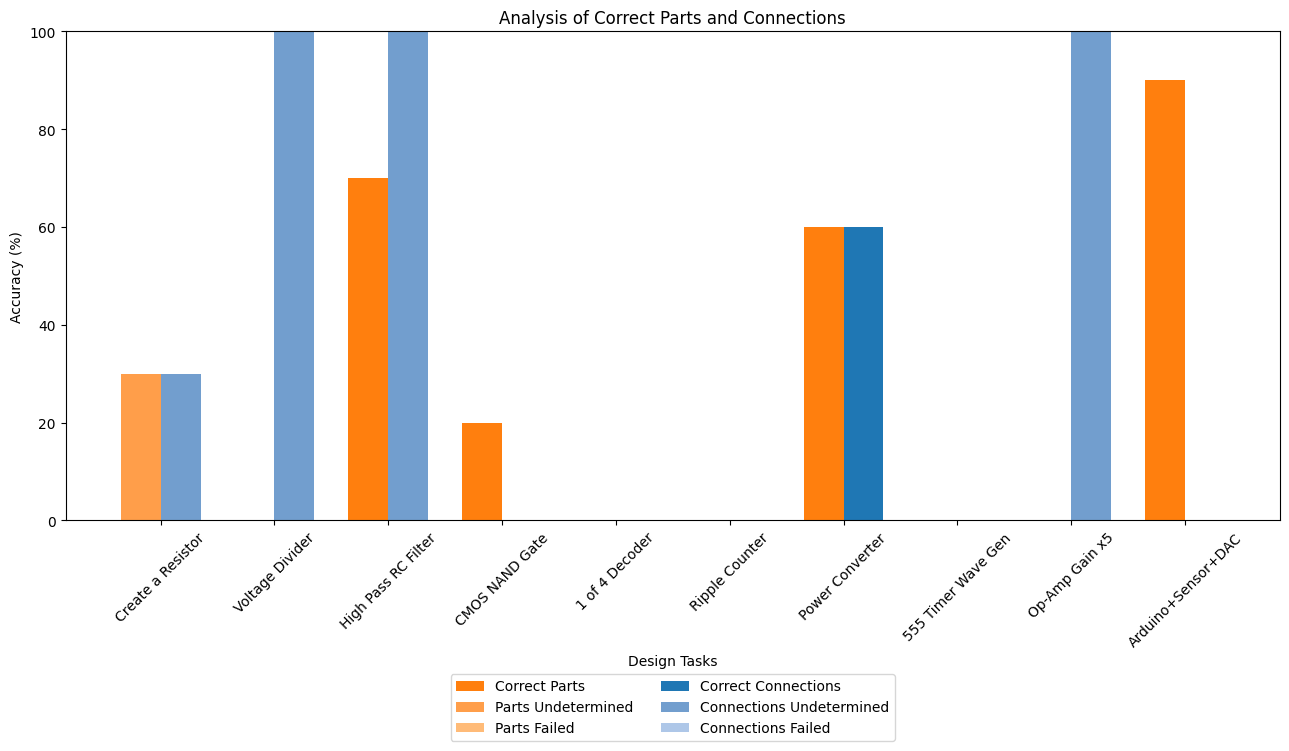

Column names in 'Input 1#' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 2' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 3' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 4' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections']
Column names in 'Input 5' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections']
Column names in 'Input 6' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 7' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections', 'Unnamed: 4']
Column names in 'Input 8#' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections']
Column names in 'Input 9' sheet: ['Temperature', 'API Output', 'Correct Parts', 'Correct Connections']
C

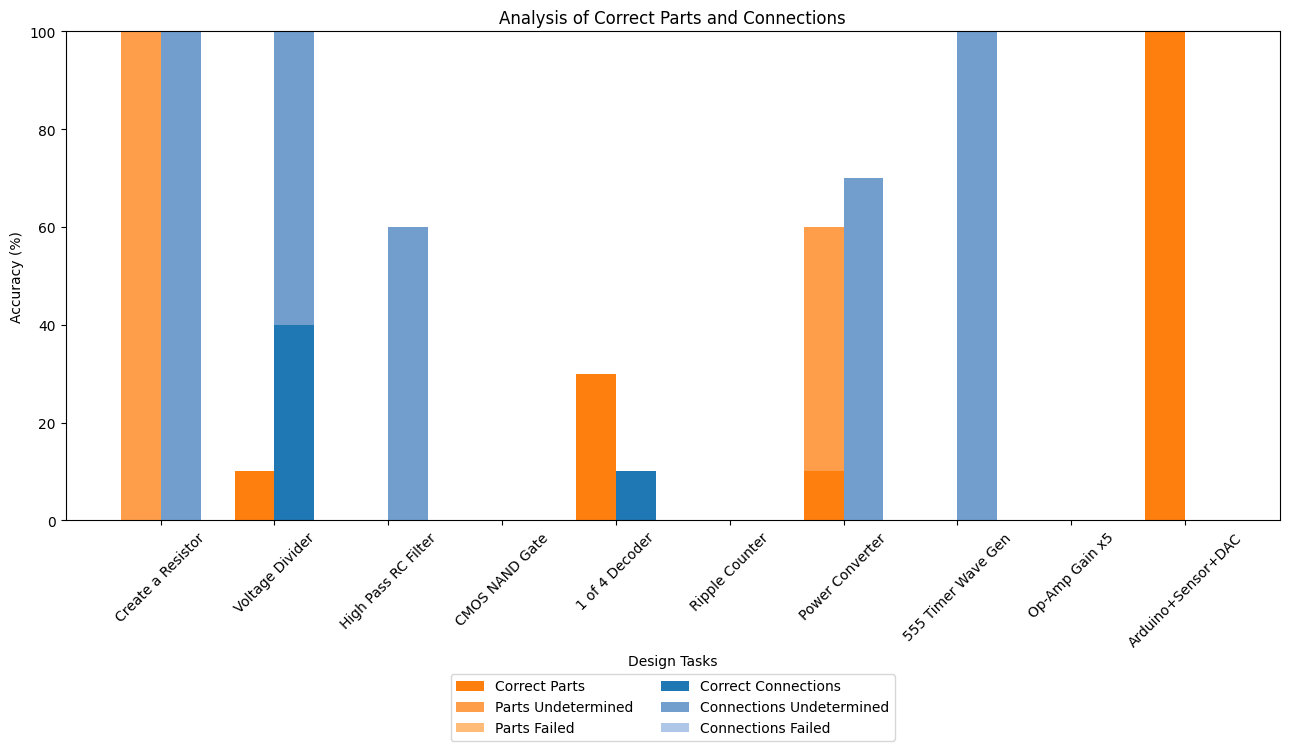

In [140]:
for file in files: 
    analyze_excel(dir + 'Results/', file)

In [141]:
def analyze_stats_excel(file_path):

    with pd.ExcelFile(file_path) as xls:
        sheet_names = xls.sheet_names  # List of sheet names in the Excel file

    # Initialize lists to store the results
    total_correct_parts_y_count = 0
    total_correct_connection_y_count = 0
    total_rows = 0

    # Iterate over each sheet
    for sheet_name in sheet_names:
        df = pd.read_excel(file_path, sheet_name=sheet_name)

        # Filter out rows where the temperature is not 0
        df_filtered = df[df['Temperature'] == 0.0]
        
        # Calculate counts for 'Y's and 'U's
        total_correct_parts_y_count += df_filtered[df_filtered['Correct Parts'] == 'Y'].shape[0]
        total_correct_connection_y_count += df_filtered[df_filtered['Correct Connections'] == 'Y'].shape[0]

        total_rows += df_filtered.shape[0]

    
    parts = (total_correct_parts_y_count / total_rows) * 100
    connections = (total_correct_connection_y_count / total_rows) * 100
    
    return parts, connections

In [142]:
my_dict = {}

for file in files: 
    parts, connections = analyze_stats_excel(dir + "Results/" + file)
    my_dict[file] = [parts, connections]

    
# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame.from_dict(my_dict, orient='index', columns=['Parts', 'Connections'])

# Display the DataFrame
print(df)

                             Parts  Connections
GPT4 Results.xlsx             85.0         53.0
GPT3.5 Results.xlsx           51.0          8.0
Claude2.1 Results.xlsx        41.0         34.0
Llama_2_13b Results.xlsx      24.0          6.0
Zephyr_7b_beta Results.xlsx   15.0          5.0


In [143]:
# Provided difficulty levels mapping
difficulty_levels = {
    "Create a Resistor": "Easy",
    "Voltage Divider": "Easy",
    "High Pass RC Filter": "Medium",
    "CMOS NAND Gate": "Medium",
    "1 of 4 Decoder": "Medium",
    "Ripple Counter": "Hard",
    "Power Converter": "Easy",
    "555 Timer Wave Gen": "Hard",
    "Op-Amp Gain x5": "Medium",
    "Arduino+Sensor+DAC": "Hard"
}

# Accumulator for difficulties
difficulty_accumulator = {
    "Easy": {"Parts": 0, "Connections": 0, "Total": 0},
    "Medium": {"Parts": 0, "Connections": 0, "Total": 0},
    "Hard": {"Parts": 0, "Connections": 0, "Total": 0}
}

# Expected totals for calculating percentages
expected_totals = {
    "Easy": {"Parts": 150, "Connections": 150},
    "Medium": {"Parts": 200, "Connections": 200},
    "Hard": {"Parts": 150, "Connections": 150}
}

def analyze_stats_excel(file_path):
    with pd.ExcelFile(file_path) as xls:
        sheet_names = xls.sheet_names  # List of sheet names in the Excel file

        # Iterate over each sheet
        for sheet_name, new_sheet_name in zip(sheet_names, new_sheet_names):
            df = pd.read_excel(file_path, sheet_name=sheet_name)

            difficulty = difficulty_levels.get(new_sheet_name)

            if difficulty:  # If the sheet_name has a mapped difficulty
                df_filtered = df[df['Temperature'] == 0.0]

                difficulty_accumulator[difficulty]['Parts'] += df_filtered[df_filtered['Correct Parts'] == 'Y'].shape[0]
                difficulty_accumulator[difficulty]['Connections'] += df_filtered[df_filtered['Correct Connections'] == 'Y'].shape[0]
                difficulty_accumulator[difficulty]['Total'] += df_filtered.shape[0]


for file in files: 
    analyze_stats_excel(dir + "Results/" + file)
    print(file)



def calculate_and_print_percentages():
    for difficulty, scores in difficulty_accumulator.items():
        parts_percentage = (scores['Parts'] / expected_totals[difficulty]['Parts']) * 100
        connections_percentage = (scores['Connections'] / expected_totals[difficulty]['Connections']) * 100
        print(f"{difficulty} - Parts: {parts_percentage}%, Connections: {connections_percentage}%")


calculate_and_print_percentages()

print(difficulty_accumulator)

GPT4 Results.xlsx
GPT3.5 Results.xlsx
Claude2.1 Results.xlsx
Llama_2_13b Results.xlsx
Zephyr_7b_beta Results.xlsx
Easy - Parts: 46.0%, Connections: 44.666666666666664%
Medium - Parts: 35.0%, Connections: 16.0%
Hard - Parts: 51.33333333333333%, Connections: 4.666666666666667%
{'Easy': {'Parts': 69, 'Connections': 67, 'Total': 150}, 'Medium': {'Parts': 70, 'Connections': 32, 'Total': 200}, 'Hard': {'Parts': 77, 'Connections': 7, 'Total': 150}}


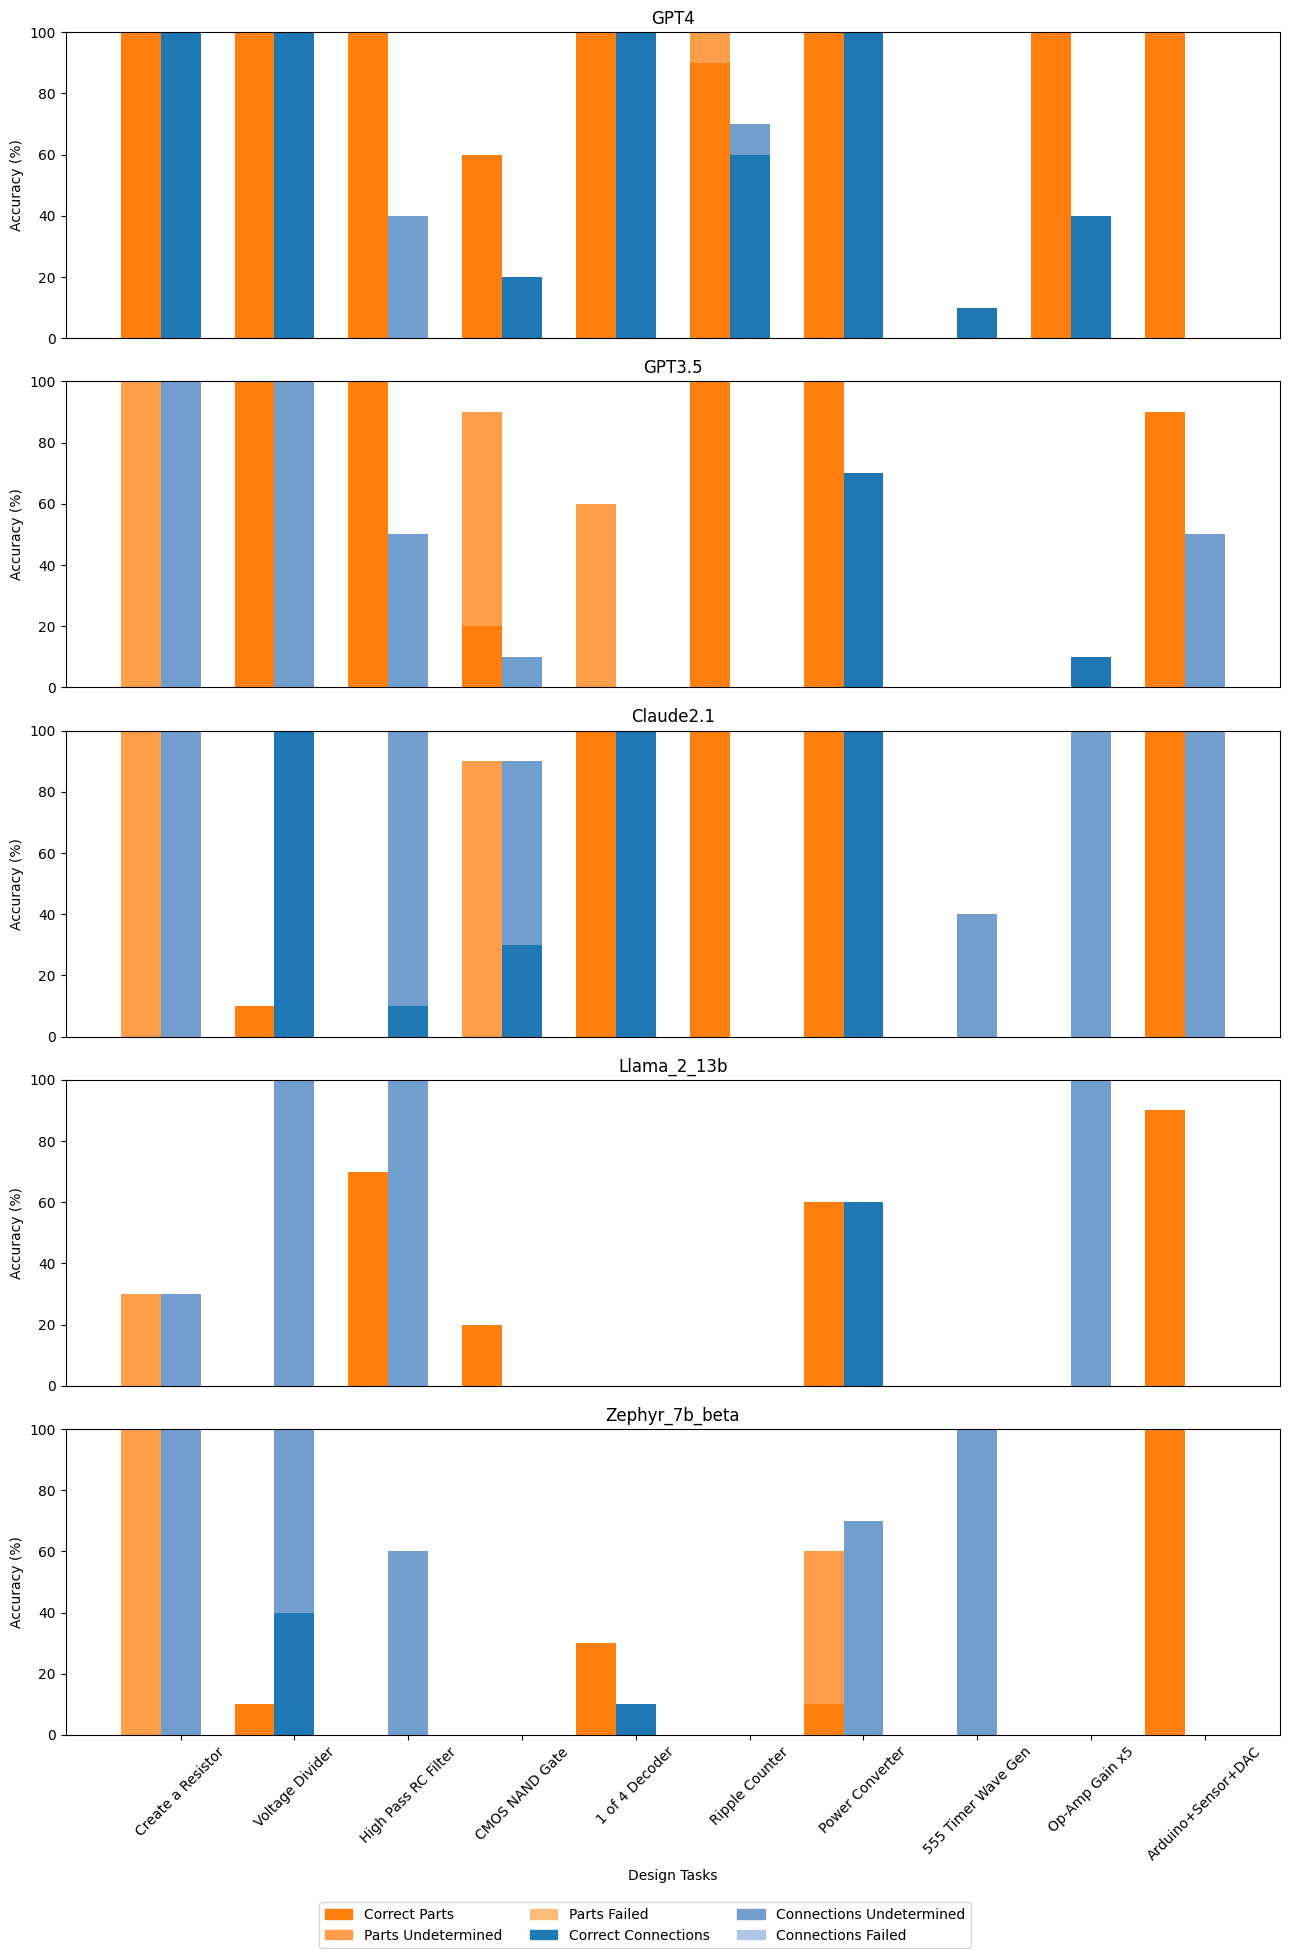

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Function to analyze and plot data from an Excel file
def analyze_and_plot(ax, path, filename):
    with pd.ExcelFile(path + filename) as xls:
        sheet_names = xls.sheet_names

    # Lists to store results
    correct_parts_ys, correct_parts_us, correct_parts_fs = [], [], []
    correct_connection_ys, correct_connection_us, correct_connection_fs = [], [], []

    for sheet_name in sheet_names:
        df = pd.read_excel(path + filename, sheet_name=sheet_name)
        df_filtered = df[df['Temperature'] == 0.0]

        # Count occurrences and calculate percentages
        for category, correct_list in zip(['Y', 'U', 'F'], 
                                          [correct_parts_ys, correct_parts_us, correct_parts_fs]):
            count = df_filtered[df_filtered['Correct Parts'] == category].shape[0]
            total_rows = df_filtered.shape[0]
            correct_list.append((count / total_rows) * 100 if total_rows != 0 else 0)

        for category, correct_list in zip(['Y', 'U', 'F'], 
                                          [correct_connection_ys, correct_connection_us, correct_connection_fs]):
            count = df_filtered[df_filtered['Correct Connections'] == category].shape[0]
            total_rows = df_filtered.shape[0]
            correct_list.append((count / total_rows) * 100 if total_rows != 0 else 0)

    # Colors for the bars
    bar_width = 0.35
    index = np.arange(len(new_sheet_names))

    # Plot bars for each category
    bottom_ys = np.array(correct_parts_ys)
    bottom_us = bottom_ys + np.array(correct_parts_us)
    ax.bar(index, correct_parts_ys, bar_width, color=colors[0])
    ax.bar(index, correct_parts_us, bar_width, bottom=bottom_ys, color=colors[1])
    ax.bar(index, correct_parts_fs, bar_width, bottom=bottom_us, color=colors[2])

    bottom_ys = np.array(correct_connection_ys)
    bottom_us = bottom_ys + np.array(correct_connection_us)
    ax.bar(index + bar_width, correct_connection_ys, bar_width, color=colors[3])
    ax.bar(index + bar_width, correct_connection_us, bar_width, bottom=bottom_ys, color=colors[4])
    ax.bar(index + bar_width, correct_connection_fs, bar_width, bottom=bottom_us, color=colors[5])

    # Axis labels and title
    ax.set_ylabel('Accuracy (%)')
    ax.set_title(filename.replace(" Results.xlsx", ""))

    if ax.get_subplotspec().is_last_row():
        ax.set_xlabel('Design Tasks')
        ax.set_xticks(index + bar_width)
        ax.set_xticklabels(new_sheet_names, rotation=45)
    else:
        ax.set_xticks([])

    ax.set_ylim([0, 100])

# Create subplots for each file
fig, axes = plt.subplots(len(files), 1, figsize=(13, 4 * len(files)))

for ax, file in zip(axes, files):
    analyze_and_plot(ax, dir + "Results/", file)


# Global legend at the bottom
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
labels = ['Correct Parts', 'Parts Undetermined', 'Parts Failed', 
          'Correct Connections', 'Connections Undetermined', 'Connections Failed']

fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.02), ncol=3)

plt.tight_layout()
plt.subplots_adjust(bottom=0.13)  # Adjust this value as needed to fit the legend
plt.savefig(dir + "Figures/" + f"combined_results{testnumber}.png")
plt.show()
